In [1]:
#import important libraries
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gathering data

In [2]:
# Read the twitter_archive_enhanced.csv file
df_arch = pd.read_csv("twitter-archive-enhanced.csv")
df_arch.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
# Predictions of dog breeds
url_image_pred = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/'
                         '599fd2ad_image-predictions/image-predictions.tsv')

# Create dataframe from TSV
df_image_pred = pd.read_csv(url_image_pred, delimiter='\t')

In [4]:
# read json content as pandas DataFrame
df_tweet = pd.read_json('tweet-json.txt', lines= True, encoding = 'utf-8')

In [5]:
# select only certain tweet elements in dataframe
df_tweet = df_tweet.loc[:,['id', 'favorite_count', 'retweet_count']]

### Twitter API

In [6]:
# import tweepy

# consumer_key = 'YOUR CONSUMER KEY'
# consumer_secret = 'YOUR CONSUMER SECRET'
# access_token = 'YOUR ACCESS TOKEN'
# access_secret = 'YOUR ACCESS SECRET'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth)

## Assessing Data

In [7]:
#take a look at df_arch
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
#view first 5 rows of df_arch
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
#view last 5 rows of df_arch
df_arch.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
#count names
df_arch.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Penny           10
Tucker          10
Lola            10
Winston          9
Bo               9
Sadie            8
the              8
an               7
Bailey           7
Daisy            7
Buddy            7
Toby             7
Rusty            6
Koda             6
Stanley          6
Milo             6
Jax              6
Scout            6
Oscar            6
Jack             6
Dave             6
Leo              6
Bella            6
Sammy            5
              ... 
Alfy             1
Hazel            1
Nico             1
Karl             1
Vinnie           1
Siba             1
Mack             1
Mya              1
Kingsley         1
Glenn            1
Holly            1
Amélie           1
General          1
Ridley           1
Jim              1
Ed               1
Crumpet          1
Swagger          1
Dwight           1
Shelby           1
Leonard          1
Dylan       

In [11]:
#discover the unigue values in the name col
df_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [12]:
#count rating_denominator values
df_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
#count rating_numerator values
df_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
#take a look at df_image_pred
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#view first 5 rows of df_image_pred
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
#view last 5 rows of df_image_pred
df_image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [17]:
#discover col names
df_image_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [18]:
#take a look at the firest 5 rows
df_tweet.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [19]:
#take a look at the last 5 rows
df_tweet.tail()

,id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [20]:
#discover info
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


### Quality

- Incorrect and misspelled  dog names
- The name column has values don't seem to be a name like 'a','an', and 'his'
- The numerator need to be convert to float type and drop the unusual values in denominator
- Calculating the over all rating
- Timestamp, tweet_id need to be convert to datetime object and str respectively
- Drop columns that aren't needed for analysis
- Exclude any tweet that is a retweet
- Entries in p1,p2 and p3 have inconsistent capitalization to be tweet_id to match other two tables

### Tidiness

- Join the 3 tables 
- Make all dog stages in one column

## Cleaning Data

In [21]:
# Copy the dataframes 
cleaned_df_arch = df_arch.copy()
cleaned_df_image_pred = df_image_pred.copy()
cleaned_df_tweet = df_tweet.copy()

#### Define
Correcting dogs names

#### Code

In [22]:
# replacing wrong names with None value or corrected Name
cleaned_df_arch['name'].replace("an",'None', inplace=True)
cleaned_df_arch['name'].replace("a",'None', inplace=True)
cleaned_df_arch['name'].replace("his","None", inplace=True)
cleaned_df_arch['name'].replace("by",'None', inplace=True)
cleaned_df_arch['name'].replace("actually",'None', inplace=True)
cleaned_df_arch['name'].replace("just",'None', inplace=True)
cleaned_df_arch['name'].replace("getting",'None', inplace=True) 
cleaned_df_arch['name'].replace("infuriating",'None', inplace=True) 
cleaned_df_arch['name'].replace("old",'None', inplace=True) 
cleaned_df_arch['name'].replace("all",'None', inplace=True) 
cleaned_df_arch['name'].replace("this",'None', inplace=True) 
cleaned_df_arch['name'].replace("very",'None', inplace=True) 
cleaned_df_arch['name'].replace("mad",'None', inplace=True) 
cleaned_df_arch['name'].replace("not",'None', inplace=True)
cleaned_df_arch['name'].replace("one",'None', inplace=True)
cleaned_df_arch['name'].replace("my",'None', inplace=True)
cleaned_df_arch['name'].replace("O","O'Malley", inplace=True)
cleaned_df_arch['name'].replace('the', 'None', inplace=True)
cleaned_df_arch['name'].replace("light",'None', inplace=True)
cleaned_df_arch['name'].replace("life",'None', inplace=True)
cleaned_df_arch['name'].replace("quite","None", inplace=True)
cleaned_df_arch['name'].replace("such","None", inplace=True)

#### Test

In [23]:
cleaned_df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [24]:
cleaned_df_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Quinn', 'Belle', 'Zooe

#### Define
Convert tha numerator to float and remove the 'rating_denominator' doesn't equal 10

#### Code

In [25]:
cleaned_df_arch['rating_numerator']= cleaned_df_arch['rating_numerator'].astype('float')

In [26]:
#drop all rating_denominator don't equal 10
cleaned_df_arch = cleaned_df_arch[~(cleaned_df_arch['rating_denominator'] != 10)]

#### Test

In [27]:
cleaned_df_arch['rating_numerator'].dtype

dtype('float64')

In [28]:
(cleaned_df_arch['rating_denominator'] != 10).sum()

0

#### Define
Calculating dogs rating in one column

#### Code

In [29]:
cleaned_df_arch['dog_rating'] = (cleaned_df_arch.rating_numerator/cleaned_df_arch.rating_denominator)

#### Test

In [30]:
cleaned_df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,1.2


### Define

Drop rating_numerator and rating_denominator columns

#### Code

In [31]:
cleaned_df_arch.drop(['rating_numerator', 'rating_denominator'],axis=1, inplace=True)

#### Test

In [32]:
cleaned_df_arch.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'dog_rating'],
      dtype='object')

#### Define
Convert Timestamp to datatime object and tweet_id to str

#### Code

In [33]:
#Convert Timestamp
from datetime import datetime
cleaned_df_arch['timestamp']= pd.to_datetime(cleaned_df_arch['timestamp'])

In [34]:
##Convert tweet_id to str
cleaned_df_arch.tweet_id = cleaned_df_arch.tweet_id.astype(str)

#### Test

In [35]:
cleaned_df_arch['timestamp'].dtype , cleaned_df_arch['tweet_id'].dtype

(dtype('<M8[ns]'), dtype('O'))

#### Define
Drop retweet columns that aren't needed for analysis

#### Code

In [36]:
drop_retweet = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                'in_reply_to_status_id', 'in_reply_to_user_id']
cleaned_df_arch = cleaned_df_arch.drop(drop_retweet, axis=1)

#### test

In [37]:
cleaned_df_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         2333 non-null object
timestamp        2333 non-null datetime64[ns]
source           2333 non-null object
text             2333 non-null object
expanded_urls    2278 non-null object
name             2333 non-null object
doggo            2333 non-null object
floofer          2333 non-null object
pupper           2333 non-null object
puppo            2333 non-null object
dog_rating       2333 non-null float64
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 218.7+ KB


### Define
Remove all tweets they are retweets

#### Code

In [38]:
cleaned_df_arch = cleaned_df_arch[~(cleaned_df_arch['text'].str.contains("RT @"))]

#### Test

In [39]:
(cleaned_df_arch['text'].str.contains("RT @")).sum()

0

#### Define
Lower case entries in p1,p2 and p3

#### Code

In [40]:
cleaned_df_image_pred['p1'] = cleaned_df_image_pred['p1'].str.lower()
cleaned_df_image_pred['p2'] = cleaned_df_image_pred['p2'].str.lower()
cleaned_df_image_pred['p3'] = cleaned_df_image_pred['p3'].str.lower()

#### test

In [41]:
cleaned_df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define
Change id name in df_tweet_info to be tweet_id to match other two tables

### Code

In [42]:
cleaned_df_tweet.rename(index=str, columns={"id": "tweet_id"},inplace=True)

### test

In [43]:
cleaned_df_tweet.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


#### Define

Make all dog stages in one column

#### Code

In [44]:
cleaned_df_arch['dog_stage'] = cleaned_df_arch['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [45]:
#drop ['doggo', 'floofer', 'pupper', 'puppo'] columns
cleaned_df_arch.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1,inplace=True)

#### Test

In [46]:
cleaned_df_arch.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'dog_rating', 'dog_stage'],
      dtype='object')

In [47]:
cleaned_df_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2153 non-null object
timestamp        2153 non-null datetime64[ns]
source           2153 non-null object
text             2153 non-null object
expanded_urls    2099 non-null object
name             2153 non-null object
dog_rating       2153 non-null float64
dog_stage        357 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 151.4+ KB


### Define
Convert tweet_id columns in all dataframes from int to str

#### Code

In [48]:
# #Convert tweet_id columns in all dataframes from int to str
cleaned_df_arch['tweet_id']= cleaned_df_arch['tweet_id'].astype('str')
cleaned_df_tweet['tweet_id']= cleaned_df_tweet['tweet_id'].astype('str')
cleaned_df_image_pred['tweet_id']= cleaned_df_image_pred['tweet_id'].astype('str')

#### Test

In [49]:
cleaned_df_arch.dtypes , cleaned_df_tweet.dtypes , cleaned_df_image_pred.dtypes

(tweet_id                 object
 timestamp        datetime64[ns]
 source                   object
 text                     object
 expanded_urls            object
 name                     object
 dog_rating              float64
 dog_stage                object
 dtype: object, tweet_id          object
 favorite_count     int64
 retweet_count      int64
 dtype: object, tweet_id     object
 jpg_url      object
 img_num       int64
 p1           object
 p1_conf     float64
 p1_dog         bool
 p2           object
 p2_conf     float64
 p2_dog         bool
 p3           object
 p3_conf     float64
 p3_dog         bool
 dtype: object)

#### Define
Jion the three tables

#### Code

In [50]:
cleaned_df_arch = pd.merge(cleaned_df_arch, cleaned_df_tweet,how='left',on='tweet_id')

In [51]:
cleaned_df_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 10 columns):
tweet_id          2153 non-null object
timestamp         2153 non-null datetime64[ns]
source            2153 non-null object
text              2153 non-null object
expanded_urls     2099 non-null object
name              2153 non-null object
dog_rating        2153 non-null float64
dog_stage         357 non-null object
favorite_count    2153 non-null int64
retweet_count     2153 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 185.0+ KB


In [52]:
master_df = pd.merge(cleaned_df_arch, cleaned_df_image_pred, how='inner', on='tweet_id')

#### test

In [53]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 21 columns):
tweet_id          1976 non-null object
timestamp         1976 non-null datetime64[ns]
source            1976 non-null object
text              1976 non-null object
expanded_urls     1976 non-null object
name              1976 non-null object
dog_rating        1976 non-null float64
dog_stage         319 non-null object
favorite_count    1976 non-null int64
retweet_count     1976 non-null int64
jpg_url           1976 non-null object
img_num           1976 non-null int64
p1                1976 non-null object
p1_conf           1976 non-null float64
p1_dog            1976 non-null bool
p2                1976 non-null object
p2_conf           1976 non-null float64
p2_dog            1976 non-null bool
p3                1976 non-null object
p3_conf           1976 non-null float64
p3_dog            1976 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(4), int64(3), object(10)
mem

## Storing Data

In [54]:
# Save the final DataFrame to csv file
master_df.to_csv('twitter_archive_master.csv')

## Analyzing Data

In [55]:
# Read the updated dataframe
new_df= pd.read_csv("twitter_archive_master.csv")

In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 22 columns):
Unnamed: 0        1976 non-null int64
tweet_id          1976 non-null int64
timestamp         1976 non-null object
source            1976 non-null object
text              1976 non-null object
expanded_urls     1976 non-null object
name              1976 non-null object
dog_rating        1976 non-null float64
dog_stage         319 non-null object
favorite_count    1976 non-null int64
retweet_count     1976 non-null int64
jpg_url           1976 non-null object
img_num           1976 non-null int64
p1                1976 non-null object
p1_conf           1976 non-null float64
p1_dog            1976 non-null bool
p2                1976 non-null object
p2_conf           1976 non-null float64
p2_dog            1976 non-null bool
p3                1976 non-null object
p3_conf           1976 non-null float64
p3_dog            1976 non-null bool
dtypes: bool(3), float64(4), int64(5), obje

In [57]:
#take a look at the new datarame
new_df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,name,dog_rating,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,33819,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,25461,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,42908,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,41048,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [58]:
#drop Unnamed: 0 column
new_df.drop('Unnamed: 0',axis=1,inplace=True)

In [59]:
new_df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_rating,dog_stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,39467,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,33819,6514,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,25461,4328,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,42908,8964,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,41048,9774,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [60]:
new_df.describe()

,tweet_id,dog_rating,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.976000e+03,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1.976000e+03,1.976000e+03
mean,7.360217e+17,1.169838,8921.050607,2769.273785,1.202935,0.593646,1.347591e-01,6.018989e-02
std,6.764193e+16,4.085125,12248.918997,4682.983010,0.561022,0.272086,1.008010e-01,5.077157e-02
min,6.660209e+17,0.000000,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757942e+17,1.000000,1956.750000,622.750000,1.000000,0.362063,5.411538e-02,1.605498e-02
50%,7.084132e+17,1.100000,4141.000000,1354.500000,1.000000,0.587440,1.181350e-01,4.952715e-02
75%,7.881575e+17,1.200000,11339.750000,3224.250000,1.000000,0.844247,1.955617e-01,9.162278e-02
max,8.924206e+17,177.600000,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


## Visualizations and Analyses

### Analyses Questions 

- Which type of dog has the highest rating ?
- Which type of dog has the highest favorate and retweet ?
- Is there any correlation between retweet count,rating and dogs type ?

#### The highest dog type rating

In [61]:
#creat a new dataframe with the columns that I intrested in

top_type = new_df[['dog_stage','dog_rating','favorite_count','retweet_count']].sort_values(by = 'dog_rating' , ascending=False)



In [62]:
top_type.head()

,dog_stage,dog_rating,favorite_count,retweet_count
723,NaN,177.6,5569,2772
1701,NaN,42.0,7989,4324
501,NaN,7.5,20296,7069
551,NaN,2.7,7320,1885
1359,pupper,2.6,1879,542


(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 8 Text yticklabel objects>)

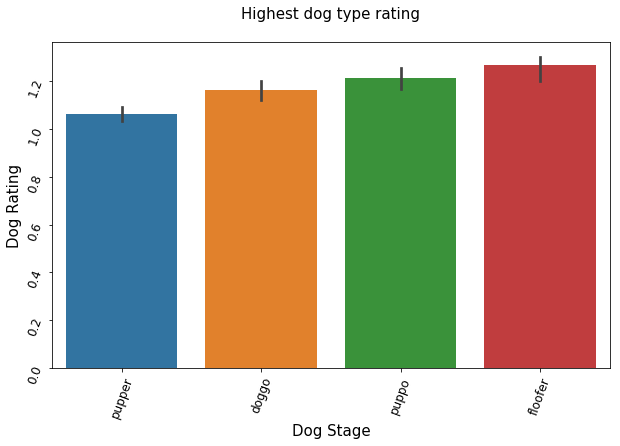

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x="dog_stage", y="dog_rating", data=top_type);
plt.title('Highest dog type rating\n', fontsize=15)
# plt.xlabel('Words')
plt.xlabel('Dog Stage',fontsize = 15)
plt.ylabel('Dog Rating',fontsize = 15)
plt.xticks(rotation=70,  fontsize=12)
plt.yticks(rotation=70,  fontsize=12)

As we can see here floofer type has the highest rating among other typs, and puppo come next where pupper got the lowest rating

#### Which type of dog has the highest favorate and retweet ?

(array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.,  40000.]), <a list of 9 Text yticklabel objects>)

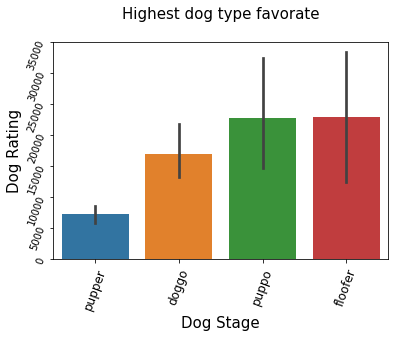

In [75]:
# plt.figure(figsize=(10, 6))
sns.barplot(x="dog_stage", y="favorite_count",data = top_type);
plt.title('Highest dog type favorate\n', fontsize=15)
# plt.xlabel('Words')
plt.xlabel('Dog Stage',fontsize = 15)
plt.ylabel('Dog Rating',fontsize = 15)
plt.xticks(rotation=70,  fontsize=12)
plt.yticks(rotation=70,  fontsize=10)

(array([     0.,   2500.,   5000.,   7500.,  10000.,  12500.,  15000.,
         17500.,  20000.]), <a list of 9 Text yticklabel objects>)

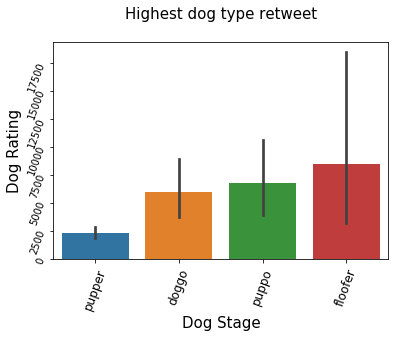

In [76]:
# plt.figure(figsize=(10, 6))
sns.barplot(x="dog_stage", y="retweet_count",data = top_type);
plt.title('Highest dog type retweet\n', fontsize=15)
# plt.xlabel('Words')
plt.xlabel('Dog Stage',fontsize = 15)
plt.ylabel('Dog Rating',fontsize = 15)
plt.xticks(rotation=70,  fontsize=12)
plt.yticks(rotation=70,  fontsize=10)

we can demonstrate form these bar charts that both floofer and puppo have the same number of favorites, which is more than 20,000 whereas, pupper has less than 10,000. On the other hand, floofer Superiority over puppo in the number if retweet where pupper still has the lowest number of retweet comparing to other types

In [87]:
top_type.retweet_count.unique().sum()

5036348

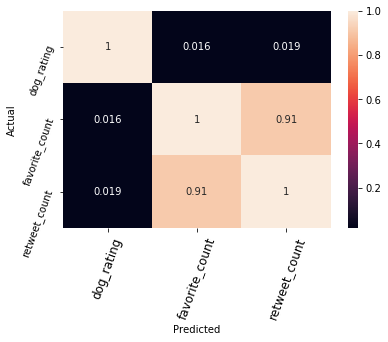

In [106]:
coolwarm = plt.get_cmap('BuPu')
corr = top_type.corr()
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)

sns.heatmap(corr,annot=True,xticklabels=sorted(corr.columns.values), yticklabels= corr.columns.values )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(rotation=70,  fontsize=12)
plt.yticks(rotation=70,  fontsize=10)
plt.show()

The correlaion between dog_rating and favorite_count and retweet_count is too weak. whereas, the correlation between favorite_count and retweet_count is high.

In [ ]:
#resources
# https://stackoverflow.com/questions/49478310/pandas-trying-to-drop-rows-based-on-for-loop
#